In [154]:
import pandas as pd
Library = pd.read_csv('./Library.csv')

In [155]:
Library

,고유번호,구명,법정동명,산지여부,주지번,부지번,새주소명,시설명,운영기관,설립주체,시설구분,개관일,면적,홈페이지주소,연락처,생성일,경도,위도
0,21,구로구,구로3동,1,777,1,구로구 디지털로 27다길 65 2층,꿈마을 도서관,구로구 시설관리공단,,구립도서관,2007-04-05,476.0,lib.guro.go.kr/dreamtown/,830-5807,,126.890115,37.487220
1,22,용산구,후암동,1,30,84,용산구 후암동 30-84,남산 도서관,,,교육청도서관,1922-10-05,0.0,lib.sen.go.kr/lib_index.jsp,,,126.981375,37.552664
2,23,중구,신당동,1,844,,중구 다산로 32,남산타운 문화체육센터 어린이도서관,시설관리공단,,구립도서관,2010-04-01,273.8,www.e-junggulib.or.kr,02-2280-8520,,127.009297,37.549020
3,24,노원구,상계10동,1,686,,노원구 온곡길 21,노원 정보도서관,노원 교육복지재단,,구립도서관,2006-02-15,6526.0,www.nowonlib.kr,02-950-0029,,127.064177,37.660927
4,25,노원구,중계3동,1,508,,노원구 중계3동 508,노원 평생학습관,,,교육청도서관,1990-05-08,0.0,lib.sen.go.kr/lib_index.jsp,,,127.067120,37.640120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,광진구,중곡동,1,168,8,광진구 능동로 16,중곡 문화체육센터 도서관,광진구 시설관리공단,,구립도서관,2008-10-27,1320.0,gwangjinlib.seoul.kr,3408-4900,,127.084751,37.567803
119,119,중구,신당동,1,52,164,중구 다산로38길 66-35,중구 구립 신당 도서관,시설관리공단,,구립도서관,2011-03-24,1557.4,www.e-junggulib.or.kr,02-2280-9240,,127.018969,37.561726
120,121,강남구,대치4동,1,928,22,강남구 도곡로 북49길 23,즐거운 도서관,(사)작은도서관 만드는 사람들,,구립도서관,2004-09-01,325.0,library.gangnam.go.kr,02-565-7533,,127.057872,37.499750
121,122,은평구,증산동,1,173,8,은평구 증산로5길 6,증산 정보도서관,사회복지법인 인덕원,,구립도서관,2008-10-09,2110.0,www.jsplib.or.kr,02-307-6030,,126.907643,37.582804


In [156]:
from urllib import parse
from urllib.request import urlopen
from urllib.request import Request
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import json

In [157]:
Client_ID = 'ey2e08g8ui'
Client_Secret = 'LUUWia2ZKTfS4CXgtTWFbBHPD0KRhNSkTMuyPJnL'
api_url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query='

In [158]:
test = Library.loc[1, '새주소명']
test = "부산광역시 동구 초량동 45-62 " # 부산항 

test = "부산 영도구 해양로301번길 17 부산항국제크루즈터미널" #부산항

test = "서울 영등포구 63로 50" # 63 빌딩
test = "서울특별시 송파구 올림픽로 300" # 잠실타워
test = "서울 종로구 사직로 161" # 경북궁
test = "인천광역시 중구 공항로 271 인천국제공항역" # 인천공학
test = "부산 동구 충장대로 314" # 부산항
test = "인천 중구 공항로 271 인천국제공항역" # 인천공항
test = "서울 영등포구 선유로 343" # 선유도 양화대교


add_urlenc = parse.quote(test) # URL Encoding
url = api_url + add_urlenc

In [159]:
test

'서울 영등포구 선유로 343'

In [160]:
request = Request(url)
request.add_header('X-NCP-APIGW-API-KEY-ID', Client_ID)
request.add_header('X-NCP-APIGW-API-KEY', Client_Secret)

try:
    response = urlopen(request)

except HTTPError as e:
    print('HTTP Error')
    latitude, longitude = None, None

else:
    rescode = response.getcode()
    
    if rescode == 200:
        response_body = response.read().decode('utf-8')
        response_body = json.loads(response_body)
        
        if response_body['addresses'] == []:
            print('No result')
        else:
            latitude = response_body['addresses'][0]['y']
            longitude = response_body['addresses'][0]['x']
            print('Success')
    else:
        print(f'Response error, rescode:{rescode}')
        latitude, longitude = None, None

Success


In [161]:
print(longitude,latitude)

126.9018193 37.5423833


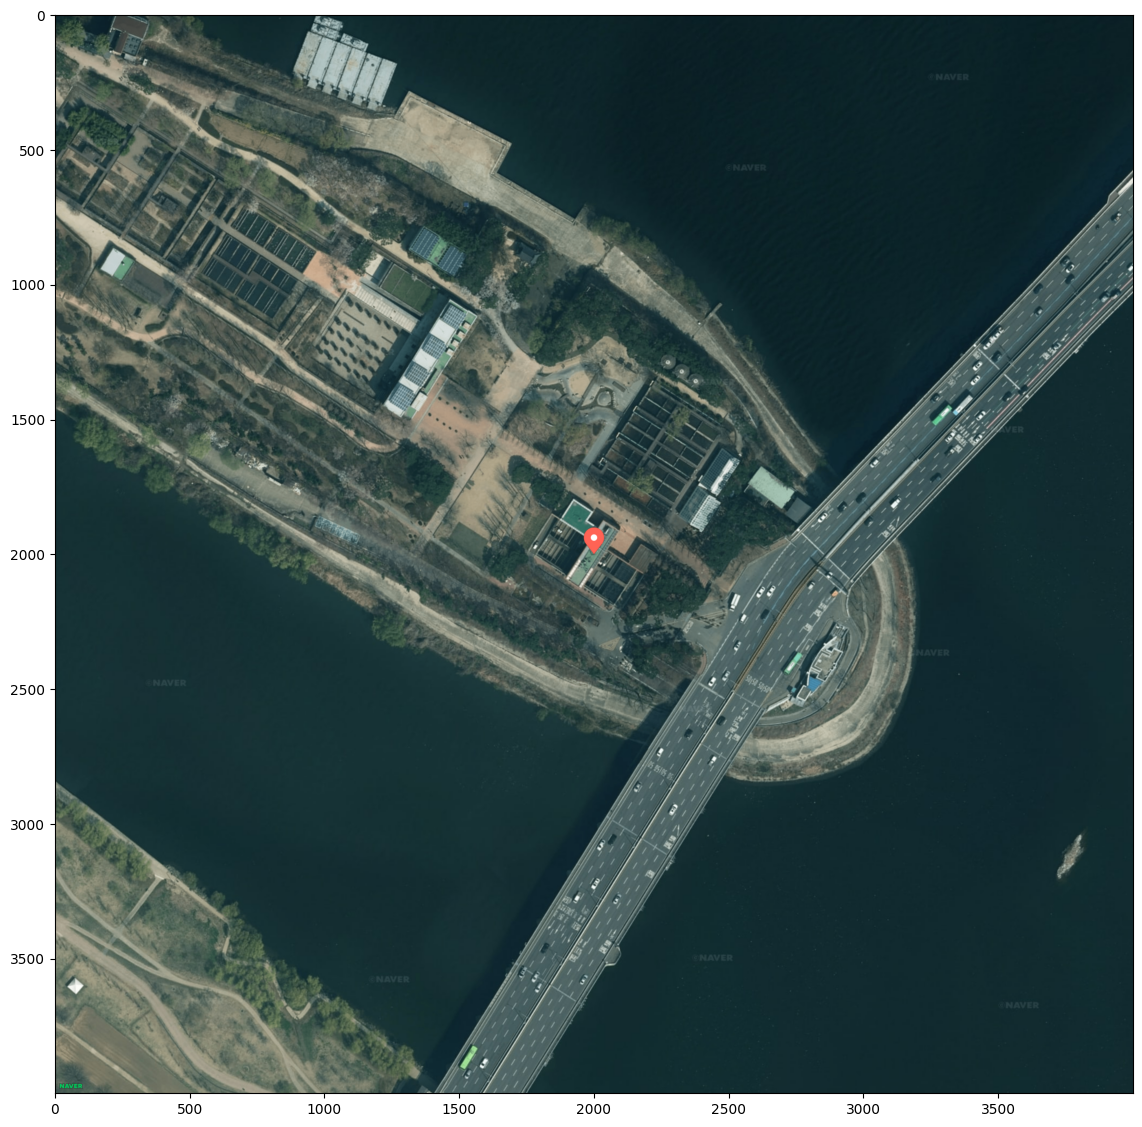

In [162]:
from PIL import Image
import matplotlib.pyplot as plt 
import requests
import io

# NCP 콘솔에서 복사한 클라이언트ID와 클라이언트Secret 값
client_id = "6zsiw90txj"
client_secret = "i2wAgtcW14gHqLAGWiv5kuiUPUSLYe6Q9VcKru3C"

# 좌표 (경도, 위도)
endpoint = "https://naveropenapi.apigw.ntruss.com/map-static/v2/raster"
headers = {
    "X-NCP-APIGW-API-KEY-ID": client_id,
    "X-NCP-APIGW-API-KEY": client_secret,
}
# 중심 좌표
lon, lat = longitude, latitude
_center = f"{lon},{lat}"
# 줌 레벨 - 0 ~ 20
_level = 18
# 가로 세로 크기 (픽셀)
_w, _h = 2000, 2000
# 지도 유형 - basic, traffic, satellite, satellite_base, terrain
_maptype = "satellite_base"
# 반환 이미지 형식 - jpg, jpeg, png8, png
_format = "png"
# 고해상도 디스펠레이 지원을 위한 옵션 - 1, 2
_scale = 2
# 마커
_markers = f"""type:d|size:mid|pos:{lon} {lat}|color:red"""
# 라벨 언어 설정 - ko, en, ja, zh
_lang = "ko"
# 대중교통 정보 노출 - Boolean
_public_transit = False
# 서비스에서 사용할 데이터 버전 파라미터 전달 CDN 캐시 무효화
_dataversion = ""

# URL
url = f"{endpoint}?center={_center}&level={_level}&w={_w}&h={_h}&maptype={_maptype}&format={_format}&scale={_scale}&markers={_markers}&lang={_lang}&public_transit={_public_transit}&dataversion={_dataversion}"
res = requests.get(url, headers=headers)

image_data = io.BytesIO(res.content)
image = Image.open(image_data)
image.save(f'/root/Geo_Cloud/Demo_images/{longitude}_{latitude}.png',"PNG") #

plt.figure(figsize=(14,14))
plt.imshow(image)
